<a href="https://colab.research.google.com/github/ParamitaDas18/ML_Lab_Codes/blob/main/Q8_Naive_Bayes__algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

pima-indians-diabetes.dataset.txt  sample_data


=== Gaussian Naive Bayes ===
Accuracy: 0.6667
F1-Score: 0.6667

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6


=== Bernoulli Naive Bayes ===
Accuracy: 0.5000
F1-Score: 0.5714

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.67      0.50      0.57         4

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.56      0.50      0.51         6



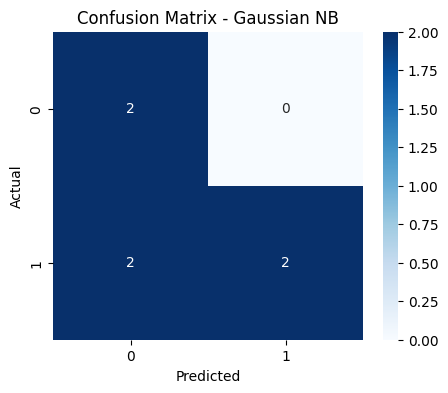

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load dataset
# Corrected filename
df = pd.read_csv("pima-indians-diabetes.dataset.txt")

# Assuming the last column is the target variable and the rest are features
# If your dataset has headers, you might need to adjust the column names
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Labels (the last column)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 4. Train Naive Bayes models
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

bnb = BernoulliNB()
bnb.fit(X_train, y_train) # Corrected: fit with y_train
y_pred_bnb = bnb.predict(X_test)

# 5. Evaluate both models
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)

accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
f1_bnb = f1_score(y_test, y_pred_bnb)

print("=== Gaussian Naive Bayes ===")
print(f"Accuracy: {accuracy_gnb:.4f}")
print(f"F1-Score: {f1_gnb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gnb))

print("\n=== Bernoulli Naive Bayes ===")
print(f"Accuracy: {accuracy_bnb:.4f}")
print(f"F1-Score: {f1_bnb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bnb))

# 6. Confusion matrix (Gaussian NB)
cm = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gaussian NB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()